Loading Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Data was acquired from twitter to carry out this analysis
It can be accessed by copying the github link below 

In [2]:
#Load data
url ='https://raw.githubusercontent.com/katenjoki/Data-Science-Workflow/main/cleaned_fintech_data.csv'
df=pd.read_csv(url,index_col=0)
df.head()

,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,0,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,0,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,0,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,0,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,0,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5621 entries, 0.0 to 2809.0
Data columns (total 20 columns):
created_at                5621 non-null object
source                    5621 non-null object
original_text             5621 non-null object
clean_text                5617 non-null object
sentiment                 5621 non-null object
polarity                  5621 non-null object
subjectivity              5621 non-null object
lang                      5621 non-null object
favorite_count            5621 non-null object
retweet_count             5621 non-null object
original_author           5621 non-null object
screen_count              5621 non-null object
followers_count           5621 non-null object
friends_count             5621 non-null object
possibly_sensitive        131 non-null object
hashtags                  813 non-null object
user_mentions             5621 non-null object
place                     1 non-null object
place_coord_boundaries    3603 non-null object

Data Pre-processing

In [4]:
#Check columns that have null values
df.columns[df.isnull().any()]

Index(['clean_text', 'possibly_sensitive', 'hashtags', 'place',
       'place_coord_boundaries'],
      dtype='object')

In [5]:
#create a new dataframe with the relevant columns
tweets= pd.DataFrame(columns=['original_text','clean_text','lang'])

tweets['original_text'] =df['original_text']
tweets['clean_text'] =df['clean_text']
tweets['lang']=df['lang']

tweets.head()

,original_text,clean_text,lang
0.0,Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,en
1.0,Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,in
2.0,Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,hi
3.0,Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,en
4.0,Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,en


In [6]:
#check for missing values
#we already know that the clean_text column has missing values
tweets.isnull().sum()

original_text    0
clean_text       4
lang             0
dtype: int64

In [7]:
#drop rows with null values
tweets =tweets.dropna()
tweets.isnull().any()

original_text    False
clean_text       False
lang             False
dtype: bool

In [8]:
#Normalisation and Transformation
#Checking random original vs clean tweet to see if the tweets are standardised
print('Original tweet',tweets.at[55.0,'original_text'])
print('\n Clean tweet',tweets.at[55.0,'clean_text'])

Original tweet ["I don't want meat from Australia. Besides their ghastly animal welfare standards and the low quality of their meat compared to EU and UK meat, there's the inescapable fact that we should be reducing about our carbon footprint. But why are the farmers not protesting???"
 "I don't want meat from Australia. Besides their ghastly animal welfare standards and the low quality of their meat compared to EU and UK meat, there's the inescapable fact that we should be reducing about our carbon footprint. But why are the farmers not protesting???"]

 Clean tweet ["I n't want meat Australia Besides ghastly animal welfare standards low quality meat compared EU UK meat 's inescapable fact reducing carbon footprint But farmers protesting"
 "I n't want meat Australia Besides ghastly animal welfare standards low quality meat compared EU UK meat 's inescapable fact reducing carbon footprint But farmers protesting"]


We can make the clean tweet even cleaner by making all words lowercase and removing the punctuation marks

In [9]:
#Making clean_text column lower case and removing punctuation marks
tweets['clean_text']=tweets['clean_text'].str.lower()

import string
def clean_text_column(tweet):
    for punctuation in string.punctuation:
        tweet = tweet.replace(punctuation," ")
    return tweet

tweets['clean_text']=tweets['clean_text'].apply(clean_text_column)

print('Clean tweet: \n',tweets.at[55.0,'clean_text'])

Clean tweet: 
 ['i n t want meat australia besides ghastly animal welfare standards low quality meat compared eu uk meat  s inescapable fact reducing carbon footprint but farmers protesting'
 'i n t want meat australia besides ghastly animal welfare standards low quality meat compared eu uk meat  s inescapable fact reducing carbon footprint but farmers protesting']


Data Visualization

In [10]:
print(tweets['lang'].unique())
print(tweets['lang'].nunique())

['en' 'in' 'hi' 'et' 'fr' 'it' 'ja' 'tl' 'ht' 'und' 'fi' 'es' 'de' 'pt'
 'no' 'tr' 'nl' 'pl' 'lang']
19


In [11]:
#No.of tweets per language
#top 10 tweets per language
tweets_10=tweets['lang'].value_counts()[:10]
tweets_10

en    3408
et    1152
in     572
tl     116
es      68
fi      50
fr      46
ht      42
it      36
hi      34
Name: lang, dtype: int64

In [12]:
type(tweets_10)

pandas.core.series.Series

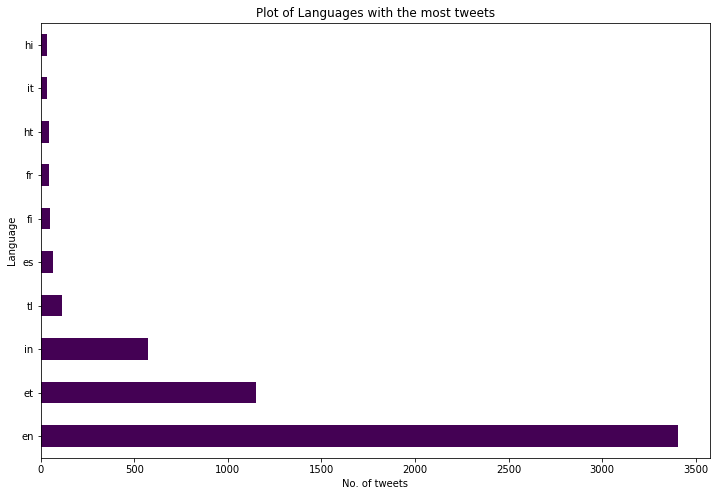

In [13]:
plt.figure(figsize=(12,8))

tweets_10.sort_values(ascending=False).plot.barh(colormap='viridis')

plt.xlabel('No. of tweets')
plt.ylabel('Language')
plt.title('Plot of Languages with the most tweets')
plt.show()

Visualizing using word cloud

In [14]:
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS

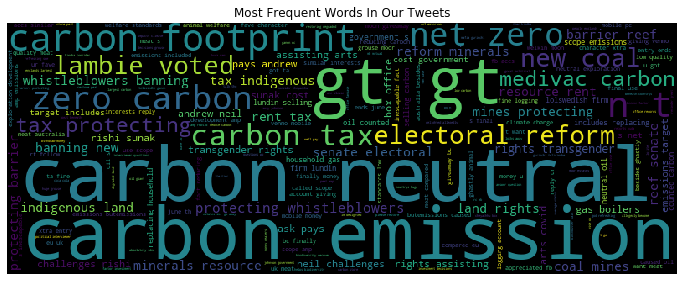

In [15]:
english = tweets[tweets['lang']=='en']

plt.figure(figsize=(12, 8))
plt.imshow(WordCloud(width=800,height=300,stopwords=STOPWORDS).generate(' '.join(english.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=12)
plt.show()